<a href="https://colab.research.google.com/github/Balara00/ML_Lab01/blob/main/label_3/ML_Lab01_label_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import required packages and libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#constants
L1 = 'label_1'
L2 = 'label_2'
L3 = 'label_3'
L4 = 'label_4'

LABELS = [L1, L2, L3, L4]
AGE_LABEL = L2
FEATURES = [f"feature_{i}" for i in range (1,257)]

Importing dataset

In [3]:
from google.colab import drive
MOUNT_PATH='/content/drive'
drive.mount(MOUNT_PATH)

Mounted at /content/drive


In [4]:
WORKING_DIR=f"{MOUNT_PATH}/MyDrive/ML_Lab 1"

In [5]:
train = pd.read_csv(f"{WORKING_DIR}/train.csv")
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [6]:
valid = pd.read_csv(f"{WORKING_DIR}/valid.csv")
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [7]:
test = pd.read_csv(f"{WORKING_DIR}/test.csv")
test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


In [8]:
train[LABELS + [FEATURES[i] for i in range(0, 256, 32)]].describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 260 entries, feature_1 to label_4
dtypes: float64(257), int64(3)
memory usage: 56.6 MB


Scaling dataset

In [9]:
from sklearn.preprocessing import StandardScaler

x_train = {}
y_train = {}
x_valid = {}
y_valid = {}
x_test = {}
y_test = {}


for target_label in LABELS:
  train_ds = train[train['label_2'].notna()] if target_label == 'label_2' else train
  valid_ds = valid
  test_ds = test

  scaler = StandardScaler()
  x_train[target_label] = pd.DataFrame(scaler.fit_transform(train_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_train[target_label] = train_ds[target_label]

  x_valid[target_label] = pd.DataFrame(scaler.transform(valid_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_valid[target_label] = valid_ds[target_label]

  x_test[target_label] = pd.DataFrame(scaler.transform(test_ds.drop(LABELS, axis = 1)), columns=FEATURES)
  y_test[target_label] = test_ds[target_label]

In [10]:
y_train['label_2']

480      25.0
481      25.0
482      25.0
483      25.0
484      25.0
         ... 
28515    29.0
28516    29.0
28517    29.0
28518    29.0
28519    29.0
Name: label_2, Length: 28040, dtype: float64

In [11]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(x_train[L3], y_train[L3])

SVC(kernel='linear')

In [12]:
from sklearn import metrics

y_pred = clf.predict(x_valid[L3])
y_pred_test_before = clf.predict(x_test[L3])

In [13]:
print('Predicted labels before feature engineering:', y_pred_test_before)

Predicted labels before feature engineering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [14]:
print (metrics.confusion_matrix(y_valid[L3], y_pred))
print (metrics.accuracy_score(y_valid[L3], y_pred))
print (metrics.precision_score(y_valid[L3], y_pred))
print (metrics.recall_score(y_valid[L3], y_pred))

[[142   0]
 [  1 607]]
0.9986666666666667
1.0
0.9983552631578947


# Feature Engineering

### SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=50)
x_train_new = selector.fit_transform(x_train[L3], y_train[L3])
print("Shape: ", x_train_new.shape)

Shape:  (28520, 50)


In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_new, y_train[L3])

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(selector.transform(x_valid[L3]))

print (metrics.confusion_matrix(y_valid[L3], y_pred))
print (metrics.accuracy_score(y_valid[L3], y_pred))
print (metrics.precision_score(y_valid[L3], y_pred))
print (metrics.recall_score(y_valid[L3], y_pred))

[[140   2]
 [  2 606]]
0.9946666666666667
0.9967105263157895
0.9967105263157895


### PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
pca.fit(x_train[L3])
x_train_trf = pd.DataFrame(pca.transform(x_train[L3]))
x_valid_trf = pd.DataFrame(pca.transform(x_valid[L3]))

print("Shape after PCA: ", x_train_trf.shape)

Shape after PCA:  (28520, 67)


In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train_trf, y_train[L3])

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(x_valid_trf)

print (metrics.confusion_matrix(y_valid[L3], y_pred))
print (metrics.accuracy_score(y_valid[L3], y_pred))
print (metrics.precision_score(y_valid[L3], y_pred))
print (metrics.recall_score(y_valid[L3], y_pred))

[[141   1]
 [  0 608]]
0.9986666666666667
0.9983579638752053
1.0


### PCA with SelectKBest

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

# Step 1: Feature selection with SelectKBest
selector = SelectKBest(f_classif, k=50)
x_train_new = selector.fit_transform(x_train[L3], y_train[L3])

# Step 2: Apply PCA to the selected features
pca = PCA(n_components=0.95, svd_solver='full')
x_train_pca = pca.fit_transform(x_train_new)

print("Shape after PCA: ", x_train_pca.shape)

Shape after PCA:  (28520, 32)


In [16]:
# Create a validation set with the same feature transformations
x_valid_new = selector.transform(x_valid[L3])
x_valid_pca = pca.transform(x_valid_new)

In [17]:
x_test_new = selector.transform(x_test[L3])
x_test_pca = pca.transform(x_test_new)

In [18]:
# Train a classifier (SVM) on the PCA-transformed features
clf = svm.SVC(kernel='linear')
clf.fit(x_train_pca, y_train[L3])

SVC(kernel='linear')

In [19]:
# Make predictions on the validation set
y_pred = clf.predict(x_valid_pca)

# Evaluate the classifier's performance
print(metrics.confusion_matrix(y_valid[L3], y_pred))
print(metrics.accuracy_score(y_valid[L3], y_pred))
print(metrics.precision_score(y_valid[L3], y_pred))
print(metrics.recall_score(y_valid[L3], y_pred))

[[140   2]
 [  2 606]]
0.9946666666666667
0.9967105263157895
0.9967105263157895


In [20]:
y_pred_test_after = clf.predict(x_test_pca)
print('Predicted labels before feature engineering:', y_pred_test_after)

Predicted labels before feature engineering: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

**Output**

In [21]:
# output_df = pd.DataFrame({
#     'Predicted labels before feature engineering': y_pred_test_before,
#     'Predicted labels after feature engineering': y_pred_test_after,
#     'No. of new features': x_test_pca.shape[1]
# })


# for i in range(257):  # Looping from 0 to 256 inclusive
#     column_name = f'new_feature_{i+1}'  # Construct the column name

#     # Check if the feature exists in x_test_pca
#     if i < x_test_pca.shape[1]:
#         output_df[column_name] = x_test_pca[:, i]  # Fill with the feature data
#     else:
#         output_df[column_name] = None  # Fill with blank or NaN values


# output_df.head()

# Create the base DataFrame
output_df = pd.DataFrame({
    'Predicted labels before feature engineering': y_pred_test_before,
    'Predicted labels after feature engineering': y_pred_test_after,
    'No of new features': [x_test_pca.shape[1]] * len(y_pred_test_before)
})

# List to store all the new feature Series
new_features = []

# Extract new features from x_test_pca
for i in range(min(256, x_test_pca.shape[1])):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series(x_test_pca[:, i], name=column_name))

# If there are any remaining columns to reach 256, fill them with NaN
for i in range(x_test_pca.shape[1], 256):
    column_name = f'new_feature_{i+1}'
    new_features.append(pd.Series([None] * len(output_df), name=column_name))

# Concatenate all the new feature columns to output_df
output_df = pd.concat([output_df] + new_features, axis=1)

output_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_247,new_feature_248,new_feature_249,new_feature_250,new_feature_251,new_feature_252,new_feature_253,new_feature_254,new_feature_255,new_feature_256
0,1,1,32,-3.111587,0.169388,1.957667,2.123426,-0.435279,-1.937396,-1.651270,...,None,None,None,None,None,None,None,None,None,None
1,1,1,32,-4.672789,-3.539205,4.280119,1.188169,-3.709309,-2.516878,2.331954,...,None,None,None,None,None,None,None,None,None,None
2,1,1,32,-2.524914,-3.369867,0.976637,2.674495,-2.385483,-1.897366,1.903285,...,None,None,None,None,None,None,None,None,None,None
3,1,1,32,-2.622502,-0.731435,1.469643,-0.668464,0.168002,-1.317778,3.126003,...,None,None,None,None,None,None,None,None,None,None
4,1,1,32,-2.338768,0.637565,4.527396,0.326658,-0.243638,-0.647482,0.283418,...,None,None,None,None,None,None,None,None,None,None


In [23]:
# Save the DataFrame to the specified CSV file path
output_df.to_csv(f"{WORKING_DIR}/190572L_label_3_final.csv", index=False)

**Co-relation Matrix**

In [ ]:
# Convert the PCA-transformed features (x_train_pca) to a Pandas DataFrame
x_train_pca_df = pd.DataFrame(x_train_pca)

# Calculate the correlation matrix
corr_matrix = x_train_pca_df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.000000e+00,1.126673e-16,-1.378167e-16,-6.782721e-17,4.058992e-16,-2.238526e-16,1.020467e-16,3.648369e-16,-1.404455e-16,6.173579e-16,...,1.213614e-16,3.512213e-16,2.634092e-16,1.784401e-16,1.569383e-16,5.963385e-17,-2.053490e-17,1.321118e-17,2.907502e-16,-4.952060e-17
1,1.126673e-16,1.000000e+00,5.192542e-16,-5.658121e-17,3.179436e-16,-2.662340e-16,-4.368845e-17,2.752578e-16,1.145037e-16,1.189380e-16,...,-1.749049e-16,-1.071069e-16,4.252861e-18,2.085077e-16,1.876575e-17,-1.793372e-16,1.789604e-16,5.700106e-17,-9.343262e-17,2.353931e-16
2,-1.378167e-16,5.192542e-16,1.000000e+00,1.860872e-16,-5.297875e-16,4.099913e-16,-1.566381e-16,1.855190e-16,-3.020064e-16,-3.120534e-16,...,2.169835e-16,4.615639e-17,3.563821e-16,-2.392464e-16,-1.839559e-16,1.870850e-16,4.392787e-17,-5.394960e-17,1.161134e-16,1.271871e-16
3,-6.782721e-17,-5.658121e-17,1.860872e-16,1.000000e+00,1.326340e-16,2.022575e-16,1.749535e-16,1.885711e-16,1.810009e-16,-1.481711e-16,...,1.272879e-16,5.934229e-17,1.267278e-16,9.690649e-17,-8.093540e-17,2.358482e-16,4.864926e-17,-6.715465e-18,1.982724e-16,-1.617897e-16
4,4.058992e-16,3.179436e-16,-5.297875e-16,1.326340e-16,1.000000e+00,-1.058310e-16,-3.770615e-16,1.012171e-15,2.308603e-17,-4.003155e-16,...,-9.143304e-17,4.083201e-17,1.495475e-17,1.010907e-16,-2.735466e-16,5.849479e-17,1.077068e-16,-3.475360e-17,-1.069749e-16,-5.072251e-17
5,-2.238526e-16,-2.662340e-16,4.099913e-16,2.022575e-16,-1.058310e-16,1.000000e+00,2.757238e-16,-5.050555e-16,-2.690941e-16,1.414114e-16,...,9.900103e-18,2.236284e-16,-2.714952e-16,9.224554e-17,1.307065e-16,1.945930e-17,-6.747173e-17,-5.455889e-17,-4.850372e-17,4.295841e-17
6,1.020467e-16,-4.368845e-17,-1.566381e-16,1.749535e-16,-3.770615e-16,2.757238e-16,1.000000e+00,-9.626648e-16,5.606002e-16,-5.395831e-16,...,-3.610052e-17,-4.722630e-17,-1.104232e-16,-2.440823e-16,2.711359e-16,-8.990993e-17,1.061403e-17,3.316812e-17,-1.311487e-16,-4.104112e-17
7,3.648369e-16,2.752578e-16,1.855190e-16,1.885711e-16,1.012171e-15,-5.050555e-16,-9.626648e-16,1.000000e+00,2.597092e-16,3.791338e-16,...,-3.832596e-16,-8.766100e-17,-5.092264e-16,-1.572723e-16,3.354262e-16,-1.669393e-16,-4.484324e-17,6.261327e-17,-2.737317e-17,3.276027e-16
8,-1.404455e-16,1.145037e-16,-3.020064e-16,1.810009e-16,2.308603e-17,-2.690941e-16,5.606002e-16,2.597092e-16,1.000000e+00,-2.834086e-16,...,-1.280500e-16,-6.014045e-17,-2.039215e-16,-6.266049e-17,-4.825691e-17,-6.099171e-17,-1.850179e-16,1.135946e-16,1.330552e-16,-6.247040e-17
9,6.173579e-16,1.189380e-16,-3.120534e-16,-1.481711e-16,-4.003155e-16,1.414114e-16,-5.395831e-16,3.791338e-16,-2.834086e-16,1.000000e+00,...,-1.274569e-16,-1.606193e-17,1.006399e-16,-1.262205e-16,4.648606e-17,-1.563847e-16,1.441995e-16,2.427363e-16,1.378994e-16,7.329977e-17


<Axes: >

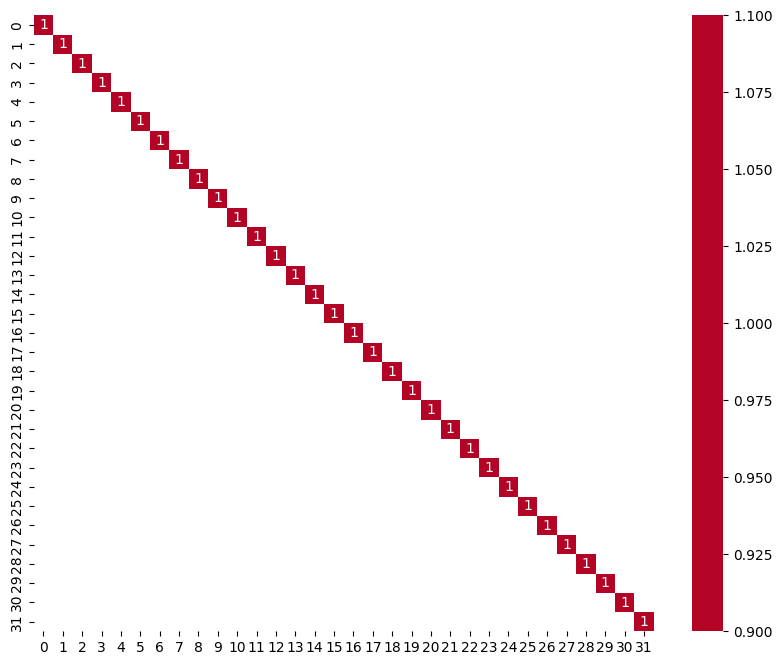

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = corr_matrix[(corr_matrix > corr_treshold) | (corr_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier with a linear kernel
clf = LogisticRegression(solver='liblinear')
# Fit the model to your training data
x_train_lr = clf.fit(x_train[L3], y_train[L3])

In [ ]:
# print("Shape after Logistic Regression: ", x_train_lr.coef_.shape)
# print("Shape after Logistic Regression: ", x_train_lr.intercept_.shape)

Shape after Logistic Regression:  (1, 256)
Shape after Logistic Regression:  (1,)


In [ ]:
# Make predictions on the validation set
y_pred = clf.predict(x_valid[L3])

# Evaluate the classifier's performance
print(metrics.confusion_matrix(y_valid[L3], y_pred))
print(metrics.accuracy_score(y_valid[L3], y_pred))
print(metrics.precision_score(y_valid[L3], y_pred, average="weighted"))
print(metrics.recall_score(y_valid[L3], y_pred, average="weighted"))

[[142   0]
 [  0 608]]
1.0
1.0
1.0


In [ ]:
# Step 1: Get predicted probabilities
y_pred_probs = clf.predict_proba(x_train[L3])

# Step 2: Create a DataFrame with predicted probabilities
y_pred_probs_df = pd.DataFrame(y_pred_probs, columns=clf.classes_)

In [ ]:
# Step 3: Calculate the correlation matrix
correlation_matrix = y_pred_probs_df.corr()
correlation_matrix

,0,1
0,1.0,-1.0
1,-1.0,1.0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(correlation_matrix, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(correlation_matrix, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(correlation_matrix, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(correlation_matrix, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(correlation_matrix, *[[[0, 1]]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(correlation_matrix, *[1, 0, None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(correlation_matrix, *[1, 'count()', None], **{})
chart

<Axes: >

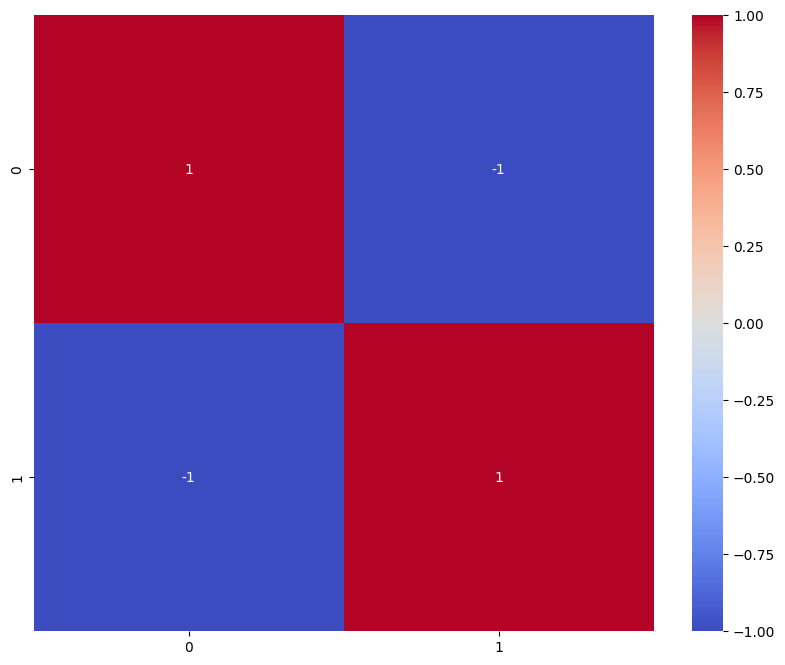

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_treshold = 0.5
filterred_correlation_matrix = correlation_matrix[(correlation_matrix > corr_treshold) | (correlation_matrix < -corr_treshold)]
plt.figure(figsize=(10,8))
sns.heatmap(filterred_correlation_matrix, annot=True, cmap='coolwarm', center = 0)